In [213]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
%ls

 Volume in drive C is The King
 Volume Serial Number is CA18-BA27

 Directory of C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Monument Detection with CNN\Monument Object Detection\Evaluations\JSON files

03/03/2023  12:00 AM    <DIR>          .
03/03/2023  12:01 AM    <DIR>          ..
03/02/2023  11:37 PM             1,780 metrics_ma PASVAL VOC.json
03/02/2023  11:37 PM             1,800 metrics_map COCO (50 to 95).json
03/02/2023  11:59 PM             8,151 px.pkl
03/03/2023  12:00 AM           474,181 py.pkl
03/02/2023  11:34 PM             3,769 train vs val box loss.json
03/02/2023  11:34 PM             3,846 train vs val class loss.json
03/02/2023  11:36 PM             3,836 train vs val obj loss.json
               7 File(s)        497,363 bytes
               2 Dir(s)  64,115,392,512 bytes free


In [14]:
with open('px.pkl', 'rb') as f:
    x_label = pickle.load(f)
with open('py.pkl', 'rb') as f:
    y_labels = pickle.load(f)
with open('ap.pkl', 'rb') as f:
    ap_values = pickle.load(f)

### Plot Full PR-Curve

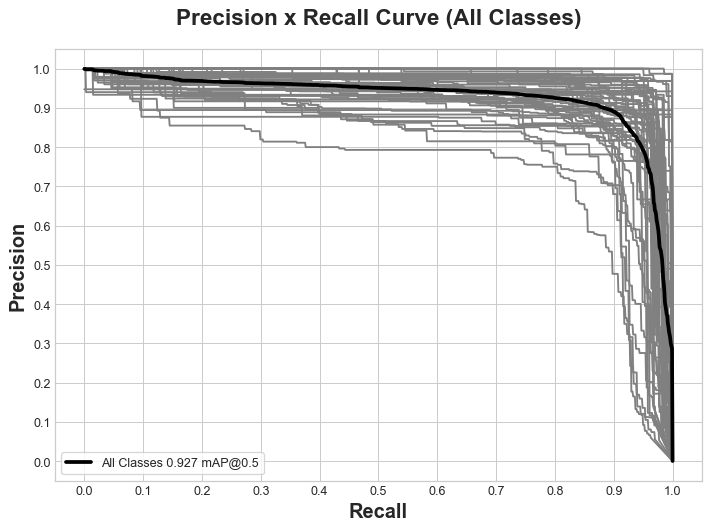

In [57]:
class_len = len(y_labels)

plt.figure(figsize = (8, 6), tight_layout = True, dpi = 90)
plt.style.use('seaborn-whitegrid')

font_label = {'size': 16, 'weight':'bold'}
font_title = {'size': 18, 'weight':'bold'}

for i, y_label in enumerate(y_labels):
    plt.plot(x_label, y_label, color = 'grey')

np_ylabels = np.array(y_labels)
stacked_ylabels = np.stack(np_ylabels, axis = 1)

plt.plot(x_label, stacked_ylabels.mean(1), linewidth=3, color='black', label = 'All Classes %.3f mAP@0.5' % np.array(ap_values)[:, 0].mean())

plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xlabel('Recall', fontdict = font_label)
plt.ylabel('Precision', fontdict = font_label)
plt.title('Precision x Recall Curve (All Classes)', fontdict = font_title, pad = 20)
plt.legend(loc = 'best', frameon = True)

save_loc = r"C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Results and Analysis\Online Model YOLO\all_classes_PR_curve.png"
plt.savefig(save_loc, dpi = 160, bbox_inches = 'tight', pad_inches = 0.15)
plt.show()
    

### Plot PR curve for Maxm and Minm AP Values

In [64]:
labels = ['badrinath temple', 'basantapur tower', 'bhagavati temple', 'bhairavnath temple', 'bhaktapur tower', 'bhimeleshvara', 'bhimsen temple', 'bhupatindra malla column', 'bhuvana lakshmeshvara', 'chasin dega', 'chayasilin mandap', 'dattatreya temple', 'degu tale temple_KDS', 'fasidega temple', 'gaddi durbar', 'garud', 'golden gate', 'gopinath krishna temple', 'hanuman idol', 'indrapura', 'jagannatha temple', 'kala-bhairava', 'kasthamandap', 'kavindrapura sattal', 'kedamatha tirtha', 'kirtipur tower', 'kumari ghar', 'lalitpur tower', 'mahadev temple', 'narayan temple', 'national gallery', 'nyatapola temple', 'palace of the 55 windows', 'panchamukhi hanuman', 'pratap malla column', 'shiva temple', 'shveta bhairava', 'siddhi lakshmi temple', 'simha sattal', 'taleju bell_BDS', 'taleju bell_KDS', 'taleju temple', 'trailokya mohan', 'vastala temple', 'vishnu temple', 'bhimsen temple_PDS', 'char narayan temple', 'chyasim deval', 'garud statue', 'harishankar temple', 'krishna mandir', 'mani ganesh temple', 'mani mandap', 'royal palace_PDS', 'taleju bell_PDS', 'taleju temple north', 'taleju temple south', 'vishwanath temple', 'yognarendra malla statue']

In [68]:
ap_list = list()
for ap_instance in ap_values:
    ap_list.append(max(ap_instance))
max_ap_in = ap_list.index(max(ap_list)) + 1
min_ap_in = ap_list.index(min(ap_list)) + 1

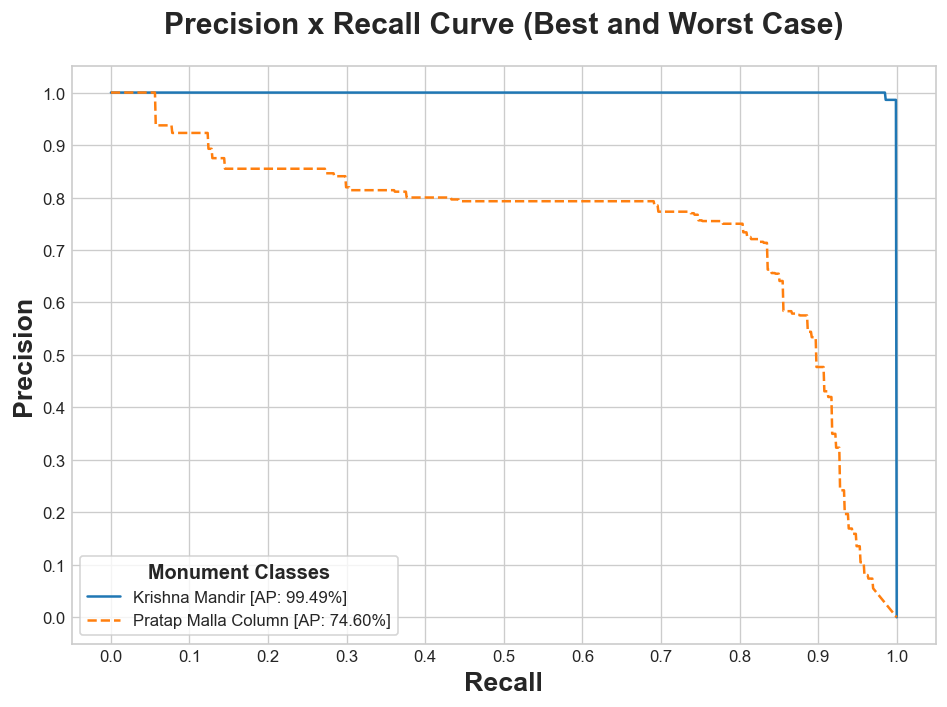

In [87]:
plt.figure(figsize = (8, 6), tight_layout = True, dpi = 120)
plt.style.use('seaborn-whitegrid')

font_label = {'size': 16, 'weight':'bold'}
font_title = {'size': 18, 'weight':'bold'}


plt.plot(x_label, y_labels[max_ap_in - 1], label = f'Krishna Mandir [AP: {ap_list[max_ap_in - 1]*100:.2f}%]')
plt.plot(x_label, y_labels[min_ap_in - 1], '--', label = f'Pratap Malla Column [AP: {ap_list[min_ap_in - 1]*100:.2f}%]')

np_ylabels = np.array(y_labels)
stacked_ylabels = np.stack(np_ylabels, axis = 1)

# plt.plot(x_label, stacked_ylabels.mean(1), linewidth=3, color='black', label = 'All Classes %.3f mAP@0.5' % np.array(ap_values)[:, 0].mean())

plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xlabel('Recall', fontdict = font_label)
plt.ylabel('Precision', fontdict = font_label)
plt.title('Precision x Recall Curve (Best and Worst Case)', fontdict = font_title, pad = 20)
plt.legend(loc = 'best', frameon = True, title = 'Monument Classes', title_fontproperties = {'size': 12, 'weight': 'bold'})

save_loc = r"C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Results and Analysis\Online Model YOLO\best and worst PR curve.png"
plt.savefig(save_loc, dpi = 160, bbox_inches = 'tight', pad_inches = 0.15)
plt.show()

### Plotting all other mAP scores and other curves

In [88]:
%ls

 Volume in drive C is The King
 Volume Serial Number is CA18-BA27

 Directory of C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Monument Detection with CNN\Monument Object Detection\Evaluations\JSON files

03/03/2023  12:05 AM    <DIR>          .
03/03/2023  12:33 AM    <DIR>          ..
03/03/2023  12:05 AM             4,872 ap.pkl
03/02/2023  11:37 PM             1,780 metrics_ma PASVAL VOC.json
03/02/2023  11:37 PM             1,800 metrics_map COCO (50 to 95).json
03/02/2023  11:59 PM             8,151 px.pkl
03/03/2023  12:00 AM           474,181 py.pkl
03/02/2023  11:34 PM             3,769 train vs val box loss.json
03/02/2023  11:34 PM             3,846 train vs val class loss.json
03/02/2023  11:36 PM             3,836 train vs val obj loss.json
               8 File(s)        502,235 bytes
               2 Dir(s)  64,171,773,952 bytes free


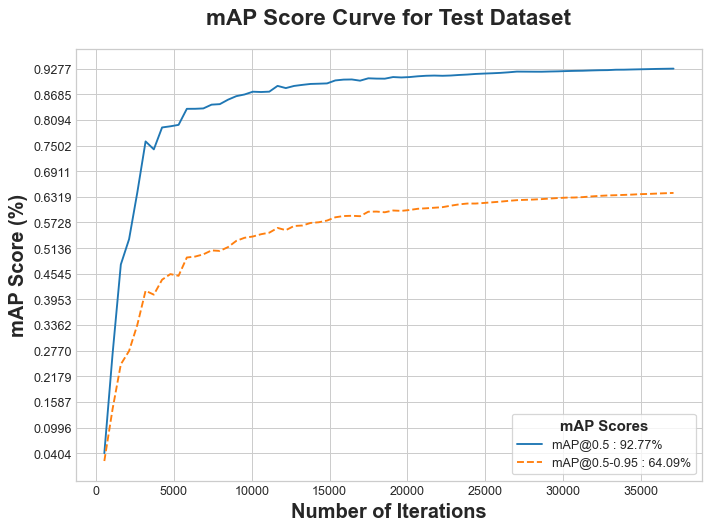

In [126]:
import json
f = open('metrics_ma PASVAL VOC.json')
data = json.load(f)
f = open('metrics_map COCO (50 to 95).json')
mAP_data = json.load(f)

plt.figure(figsize = (8, 6), tight_layout = True, dpi = 90)
plt.style.use('seaborn-whitegrid')

font_label = {'size': 16, 'weight':'bold'}
font_title = {'size': 18, 'weight':'bold'}
x_label = data[0]['x']
y_label = data[0]['y']


xCO_label = mAP_data[0]['x']
yCO_label = mAP_data[0]['y']

plt.plot(x_label, y_label, label = f'mAP@0.5 : {y_label[-1] * 100:.2f}%')
plt.plot(xCO_label, yCO_label , '--', label = f'mAP@0.5-0.95 : {yCO_label[-1] * 100:.2f}%')

ymin = y_label[0]
ymax = y_label[-1]
stepsize = (ymax - ymin) / 15.0

plt.yticks(np.arange(ymin, ymax + stepsize, stepsize))
plt.xlabel('Number of Iterations', fontdict = font_label)
plt.ylabel('mAP Score (%)', fontdict = font_label)
plt.title('mAP Score Curve for Test Dataset', fontdict = font_title, pad = 20)
plt.legend(loc = 'best', frameon = True, title = 'mAP Scores', title_fontproperties = {'size': 12, 'weight': 'bold'})

save_loc = r"C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Results and Analysis\Online Model YOLO\mAP Score Curves.png"
plt.savefig(save_loc, dpi = 160, bbox_inches = 'tight', pad_inches = 0.15)
plt.show()

### Plot all kind of Losses given

In [127]:
%ls

 Volume in drive C is The King
 Volume Serial Number is CA18-BA27

 Directory of C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Monument Detection with CNN\Monument Object Detection\Evaluations\JSON files

03/03/2023  12:05 AM    <DIR>          .
03/03/2023  01:01 AM    <DIR>          ..
03/03/2023  12:05 AM             4,872 ap.pkl
03/02/2023  11:37 PM             1,780 metrics_ma PASVAL VOC.json
03/02/2023  11:37 PM             1,800 metrics_map COCO (50 to 95).json
03/02/2023  11:59 PM             8,151 px.pkl
03/03/2023  12:00 AM           474,181 py.pkl
03/02/2023  11:34 PM             3,769 train vs val box loss.json
03/02/2023  11:34 PM             3,846 train vs val class loss.json
03/02/2023  11:36 PM             3,836 train vs val obj loss.json
               8 File(s)        502,235 bytes
               2 Dir(s)  64,119,476,224 bytes free


In [155]:
f = open('train vs val obj loss.json')
data = json.load(f)
print(data[0]['name'])
print(data[1]['name'])

train/obj_loss
val/obj_loss


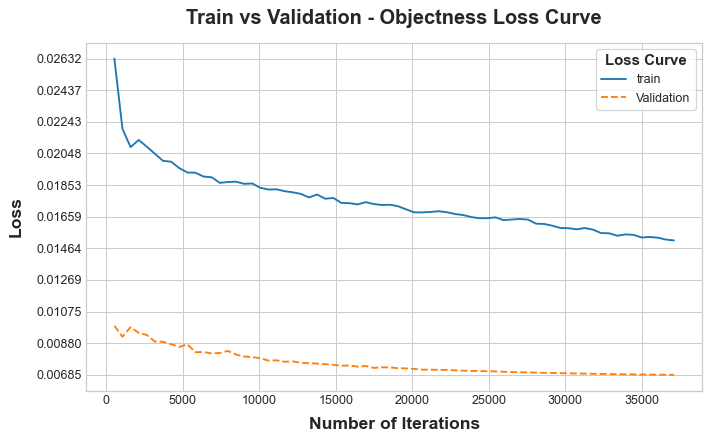

In [159]:
plt.figure(figsize = (8, 5), tight_layout = True, dpi = 90)
plt.style.use('seaborn-whitegrid')

font_label = {'size': 14, 'weight':'bold'}
font_title = {'size': 16, 'weight':'bold'}

xtrain_label = data[0]['x']
ytrain_label = data[0]['y']

xval_label = data[1]['x']
yval_label = data[1]['y']

plt.plot(xtrain_label,ytrain_label , label = 'train')
plt.plot(xval_label, yval_label, '--', label = 'Validation')

ymin = yval_label[-1]
ymax = ytrain_label[0]
stepsize = (ymax - ymin) / 10.0

plt.yticks(np.arange(ymin, ymax + stepsize, stepsize))
plt.xlabel('Number of Iterations', fontdict = font_label, labelpad = 8)
plt.ylabel('Loss', fontdict = font_label, labelpad = 10)
plt.title('Train vs Validation - Objectness Loss Curve', fontdict = font_title, pad = 15)
plt.legend(loc = 'best', frameon = True, title = 'Loss Curve', title_fontproperties = {'size': 12, 'weight': 'bold'})

save_loc = r"C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Results and Analysis\Online Model YOLO\Train vs Validation OBJECT Curve.png"
plt.savefig(save_loc, dpi = 160, bbox_inches = 'tight', pad_inches = 0.15)
plt.show()

In [160]:
f_box = open('train vs val box loss.json')
f_class = open('train vs val class loss.json')
f_obj = open('train vs val obj loss.json')

box_data = json.load(f_box)
class_data = json.load(f_class)
obj_data = json.load(f_obj)

In [170]:
box_train_np = np.array(box_data[0]['y'])
class_train_np = np.array(class_data[0]['y'])
box_train_np = np.array(box_data[0]['y'])

train_loss = (box_train_np + class_train_np + box_train_np) / 3.0

box_val_np = np.array(box_data[1]['y'])
class_val_np = np.array(class_data[1]['y'])
box_val_np = np.array(box_data[1]['y'])

val_loss = (box_val_np + class_val_np + box_val_np) / 3.0

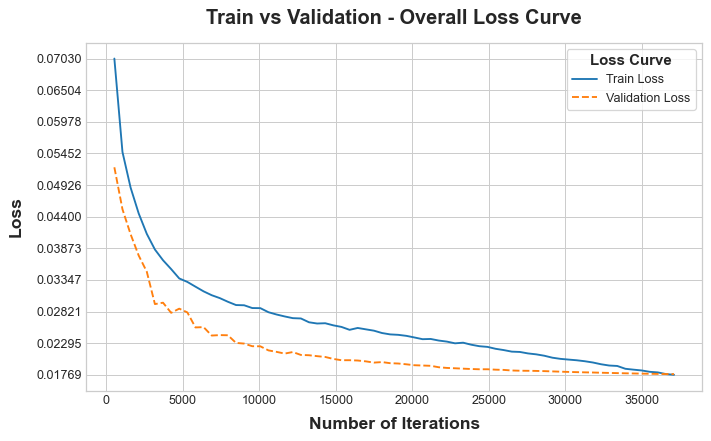

In [177]:
plt.figure(figsize = (8, 5), dpi = 90, tight_layout = True)
plt.plot(box_data[0]['x'], train_loss, label = 'Train Loss')
plt.plot(box_data[0]['x'], val_loss, '--', label = 'Validation Loss')

ymin = train_loss[-1]
ymax = train_loss[0]
stepsize = (ymax - ymin) / 10.0
plt.yticks(np.arange(ymin, ymax + stepsize, stepsize))
plt.xlabel('Number of Iterations', fontdict = font_label, labelpad = 8)
plt.ylabel('Loss', fontdict = font_label, labelpad = 10)
plt.title('Train vs Validation - Overall Loss Curve', fontdict = font_title, pad = 15)
plt.legend(loc = 'best', frameon = True, title = 'Loss Curve', title_fontproperties = {'size': 12, 'weight': 'bold'})

save_loc = r"C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Results and Analysis\Online Model YOLO\Train vs Validation OVERALL LOSS.png"
plt.savefig(save_loc, dpi = 160, bbox_inches = 'tight', pad_inches = 0.15)
plt.show()

### Perform disection from the .txt file to dataframe

In [178]:
filename = r"C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Monument Detection with CNN\Monument Object Detection\Curves and Graphs\Online Model YOLO.txt"

In [179]:
file = open(filename, 'r')
data = file.read()

In [221]:
all_data = list()
for line in data.split('\n'):
    temp_list = list()
    for word in line.split(' '):
        if word != '':
            temp_list.append(word)
    monument_name = temp_list[:-6]
    all_data.append((' '.join(monument_name), float(temp_list[-4]) * 100, float(temp_list[-3]) * 100, float(temp_list[-2]) * 100, float(temp_list[-1]) * 100)) 
    
output_df = pd.DataFrame(all_data, columns = ['Monument Name', 'Precision', 'Recall', 'AP@0.5', 'AP@0.5-0.95'])
output_df['F1 Score'] = output_df.apply(lambda x: round(2 * ((x['Precision'] * x['Recall']) / (x['Precision'] + x['Recall'])), 2), axis = 1)
output_df.to_excel(r'C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Results and Analysis\performance_metrics_YOLO.xlsx')
output_df
            

,Monument Name,Precision,Recall,AP@0.5,AP@0.5-0.95,F1 Score
0,badrinath temple,96.1,89.5,97.2,67.6,92.68
1,basantapur tower,90.4,95.0,91.8,59.2,92.64
2,bhagavati temple,83.2,90.8,87.7,49.8,86.83
3,bhairavnath temple,93.0,95.1,94.9,67.2,94.04
4,bhaktapur tower,88.7,96.0,92.1,60.4,92.21
5,bhimeleshvara,90.7,96.8,91.6,65.8,93.65
6,bhimsen temple,84.7,98.0,92.5,74.6,90.87
7,bhupatindra malla column,85.2,87.5,84.2,44.9,86.33
8,bhuvana lakshmeshvara,94.0,95.7,97.7,64.0,94.84
9,chasin dega,96.6,98.0,97.9,68.1,97.29
